## Regresión Logística multiclase

## Cargar librerías

In [35]:
import sys
sys.path.insert(0, r'C:\Users\Administrator\Documents\Proyecto seg clientes refuerzo\myenv\Lib\site-packages')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from joblib import dump
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


## Carga de datos

In [36]:
# Cargar el dataset
file_path = r'C:/Users/Administrator/Documents/Proyecto seg clientes refuerzo/Proyecto_seg_clientes/Data/teleCust1000t_listo.csv'
df = pd.read_csv(file_path)

# Ver las primeras filas para confirmar la carga
print(df.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5       0       0   
1       3      11   33        1        7   136.0   5       5       0       0   
2       3      68   52        1       24   116.0   1      29       0       1   
3       2      33   33        0       12    33.0   2       0       0       1   
4       2      23   30        1        9    30.0   1       2       0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


## Separar características y etiqueta

Identifica la variable objetivo (custcat) y separa las columnas de características (independientes) de la columna objetivo (dependiente).

In [37]:
# Separar características (X) y variable objetivo (y)
X = df.drop(columns=['custcat'])  # Características
y = df['custcat']  # Variable objetivo

## Dividir los datos en entrenamiento y prueba

Usa train_test_split para dividir los datos en conjuntos de entrenamiento y prueba. Esto permite evaluar el modelo después del entrenamiento.

In [38]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Escalar las características

Usamos StandardScaler para normalizar las características numéricas, lo que asegura que todas las variables estén en una escala comparable.

In [39]:
# Escalar las características
scaler = StandardScaler()

# Ajustar el escalador en los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba con el mismo escalador
X_test_scaled = scaler.transform(X_test)

## Crear y entrenar el modelo (regresión logística multiclase)

Creamos el modelo de regresión logística multiclase y lo entrenamos con los datos escalados.

In [40]:
# Crear el modelo de regresión logística
model = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)


C:\Users\Administrator\Documents\Proyecto seg clientes refuerzo\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=42)

## Evaluar el modelo

Usamos el conjunto de prueba para evaluar el modelo.

In [41]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')


Precisión del modelo: 0.44


In [42]:
# Exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

# Informe de clasificación
print('Informe de clasificación:')
print(classification_report(y_test, y_pred))

Exactitud del modelo: 0.44
Informe de clasificación:
              precision    recall  f1-score   support

           1       0.46      0.43      0.44        60
           2       0.37      0.33      0.35        39
           3       0.48      0.51      0.50        55
           4       0.42      0.46      0.44        46

    accuracy                           0.44       200
   macro avg       0.43      0.43      0.43       200
weighted avg       0.44      0.44      0.44       200



In [43]:
# Guardar el modelo entrenado
model_path = r'C:/Users/Administrator/Documents/Proyecto seg clientes refuerzo/proyecto_seg_clientes/modelo_logistico.pkl'
dump(model, model_path)

print(f'Modelo guardado en: {model_path}')

Modelo guardado en: C:/Users/Administrator/Documents/Proyecto seg clientes refuerzo/proyecto_seg_clientes/modelo_logistico.pkl


In [44]:
# Guardar el escalador
scaler_path = r'C:/Users/Administrator/Documents/Proyecto seg clientes refuerzo/proyecto_seg_clientes/scaler.pkl'
dump(scaler, scaler_path)

print(f'Escalador guardado en: {scaler_path}')


Escalador guardado en: C:/Users/Administrator/Documents/Proyecto seg clientes refuerzo/proyecto_seg_clientes/scaler.pkl


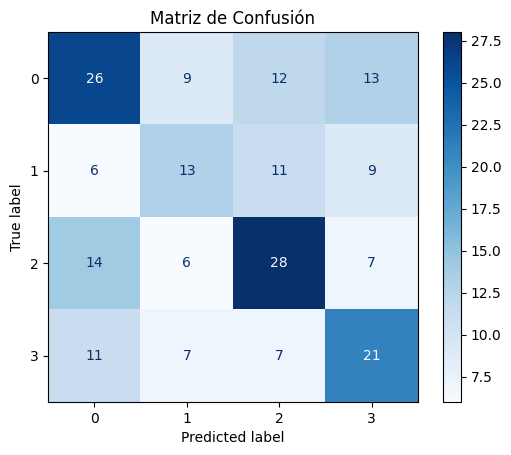

In [45]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # 'd' para mostrar los valores como enteros
plt.title('Matriz de Confusión')
plt.show()